# Trial Run Notebook
to see updates on image augmentation

In [1]:
# import required modules, packages
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# import datasets, classifiers, performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## For the next part that manipulates images
Most methods of manipulation work, except "adding random noise" and "rotation" manipulations
\
model takes a long time to train if all image manipulations are added at once, so I just tested orignal
\
dataset + one type of image manipulation (30 original signatures + 30 color inverted signatures)

In [3]:
# accessing the dataset
from PIL import Image, ImageOps

p = Path("sample_Signature/")
dirs = p.glob("*")
labels_dict = {'forge':0, 'genuin':1}

image_data = []
labels = []

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]

    for img_path in folder_dir.glob("*.png"):
        
        img = Image.open(img_path)
        if 'L' in img.getbands():  # image is black-and-white, colorize it
            img = ImageOps.colorize(img, black="blue", white="white")
        
        # resize
        img_new = img.resize((200,200))
        # convert image to numpy array
        img_array = np.asarray(img_new)
        # append each image array to image_data list
        image_data.append(img_array)
       # match the label to corresponding image
        labels.append(labels_dict[label])
        '''
        # add random noise
        from skimage.util import random_noise
        img_with_random_noise = random_noise(img_array, mode = "gaussian")
        # convert image to numpy array
        img_noise_array = np.asarray(img_with_random_noise)
        # append each image array to image_data list
        image_data.append(img_noise_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])'''
        '''
        # color to gray scale
        from skimage.color import rgb2gray
        gray_scale_img = rgb2gray(img_array)
        img_gray_array = np.asarray(gray_scale_img)
        # append each image array to image_data list
        image_data.append(img_gray_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])'''

        # image color inversion
        from skimage import util
        import numpy as np
        color_inversion_img = util.invert(img_array)
        # alternate method with numpy
        #color_inversion_img_w_np = np.invert(img)
        img_invert_array = np.asarray(color_inversion_img)
        # append each image array to image_data list
        image_data.append(img_invert_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])
        '''
        # rotate image
        from skimage.transform import rotate
        img_with_rotation = rotate(img_array, 45)
        img_rotation_array = np.asarray(img_with_rotation)
        # append each image array to image_data list
        image_data.append(img_with_rotation)
        # match the label to corresponding image
        labels.append(labels_dict[label])

        # change contrast
        import numpy as np
        from skimage import exposure
        v_min, v_max = np.percentile(img_array, (0.2, 99.8))
        better_contrast_img = exposure.rescale_intensity(img_array, in_range=(v_min, v_max))
        img_contrast_array = np.asarray(better_contrast_img)
        # append each image array to image_data list
        image_data.append(img_contrast_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])

        # gamma correction
        adjusted_gamma_img = exposure.adjust_gamma(img_array, gamma=0.4, gain=0.9)
        img_gamma_array = np.asarray(adjusted_gamma_img)
        # append each image array to image_data list
        image_data.append(img_gamma_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])

        # logarithmic correction
        log_correction_img = exposure.adjust_log(img_array)
        img_log_array = np.asarray(log_correction_img)
        # append each image array to image_data list
        image_data.append(img_log_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])

        # sigmoid correction
        sigmoid_correction_img = exposure.adjust_sigmoid(img_array)
        img_sigmoid_array = np.asarray(sigmoid_correction_img)
        # append each image array to image_data list
        image_data.append(img_sigmoid_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])'''

In [4]:
# both print statements should return the same value, one label for each image
print(len(image_data))
print(len(labels))

600
600


In [5]:
# Converting image data into numpy array
image_data = np.array(image_data, dtype = 'float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(600, 200, 200, 3) (600,)


In [6]:
# randomly shuffle data (so we get both fake and real signatures)
import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)
image_data[:], labels[:] = zip(*combined)

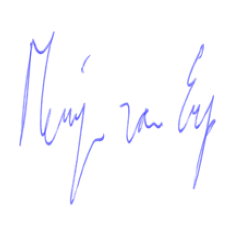

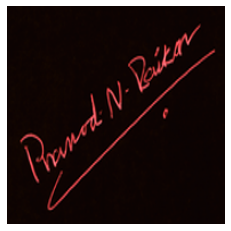

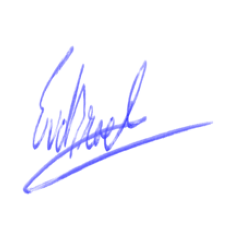

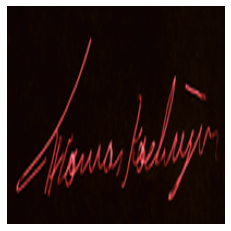

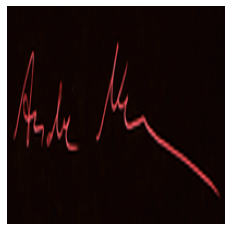

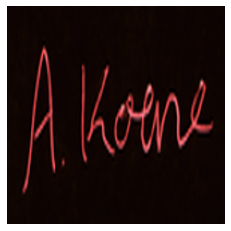

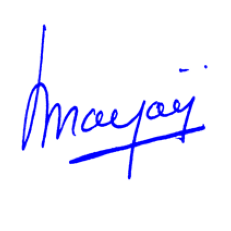

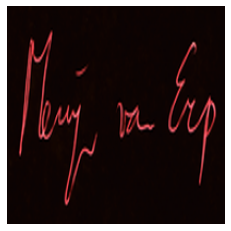

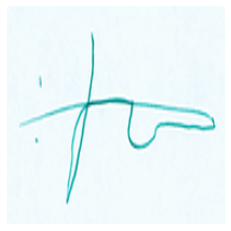

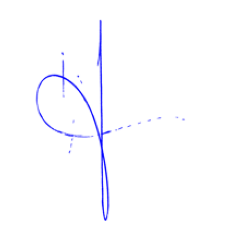

In [7]:
# visualize data
def drawImg(img_new):
    import matplotlib.pyplot as plt
    plt.imshow(img_new)
    plt.axis('off')
    plt.show()
    return

# example visualizations
for i in range(10):
    drawImg(image_data[i])

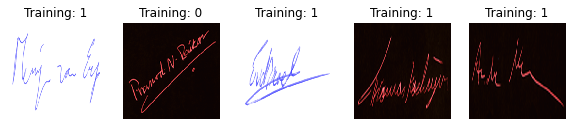

In [8]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))

# OG example used 'digits.images' and 'digits.target' instead of 'image_data' and 'labels'
for ax, image, label in zip(axes, image_data, labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

This code below is the block that takes a long time to run if more than several image manipulations are applied on our image dataset

In [9]:
# to use a classifier, first need to flatten images, convert to grayscale

# flatten images
n_samples = len(image_data)
data = image_data.reshape((n_samples, -1))

# create a classifier: support vector classifier
clf = svm.SVC(gamma = 0.001)

# split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size = 0.5, shuffle = False)

# learn the signatures on the train subset
clf.fit(X_train, y_train)

# predict the signature (forge or real) on the test subset
predicted = clf.predict(X_test)

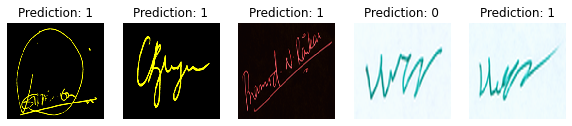

In [10]:
# take samples to predict and visualize
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(200, 200, 3)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [11]:
print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.81      0.35      0.49       155
           1       0.57      0.91      0.70       145

    accuracy                           0.62       300
   macro avg       0.69      0.63      0.59       300
weighted avg       0.69      0.62      0.59       300


